In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.stats import zscore

In [32]:
df = pd.read_csv('Cust_Spend_Data.csv')
df

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3
5,6,F,4000,3,0,1,8
6,7,G,2500,5,0,11,2
7,8,H,2500,3,0,1,1
8,9,I,2000,2,0,2,2
9,10,J,1000,4,0,1,7


In [33]:
df = df.iloc[:,2:]
df.head()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3


In [34]:
df_scaled = df.apply(zscore)
df_scaled.head(10)

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


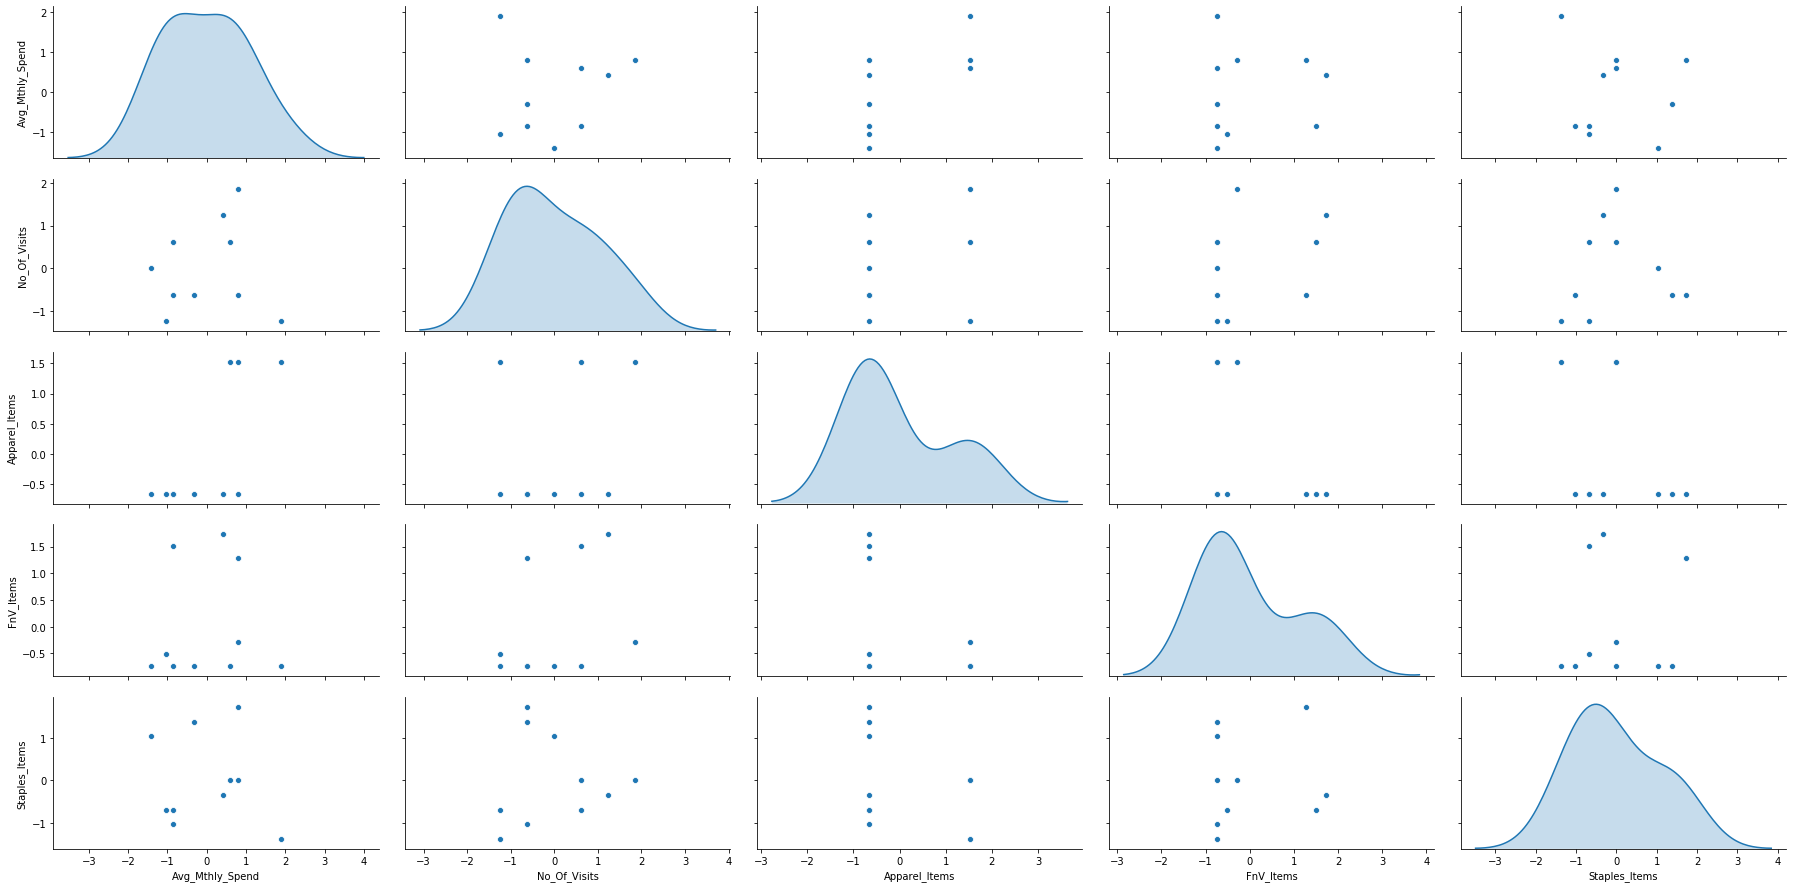

In [35]:
sns.pairplot(df_scaled, diag_kind='kde', aspect=2)

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [37]:
model = AgglomerativeClustering(n_clusters=3, linkage='average')

In [38]:
model.fit(df)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [39]:
df['Labels'] = model.labels_

In [40]:
df

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Labels
0,10000,2,1,1,0,2
1,7000,3,0,10,9,1
2,7000,7,1,3,4,1
3,6500,5,1,1,4,1
4,6000,6,0,12,3,1
5,4000,3,0,1,8,0
6,2500,5,0,11,2,0
7,2500,3,0,1,1,0
8,2000,2,0,2,2,0
9,1000,4,0,1,7,0


In [41]:
df_grouped = df.groupby('Labels')
df_grouped.mean()

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
Labels,,,,,
0,2400.0,3.40,0.0,3.2,4.0
1,6625.0,5.25,0.5,6.5,5.0
2,10000.0,2.00,1.0,1.0,0.0


In [42]:
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage

In [44]:
from scipy.spatial.distance import pdist # Pairwise data distribution between data points

In [46]:
# cophenet correlation is the correlation between the distance in the feature space and the distance in the dendogram.
# The closer it is to 1, the more better

z = linkage(df_scaled, method = 'average')
c, coph_dist = cophenet(z, pdist(df_scaled))
c

0.8681149436293064

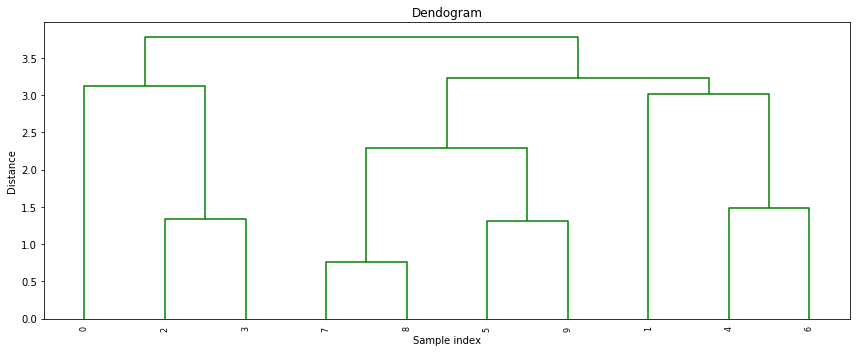

In [55]:
plt.figure(figsize=(12, 5))
plt.title('Dendogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=90., color_threshold=40, leaf_font_size=8.)
plt.tight_layout()

In [56]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

In [59]:
z = linkage(df_scaled, method='complete')
c, coph_dist = cophenet(z, pdist(df_scaled))
c

0.8606955190809153

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [50.0, 50.0, 82.5, 82.5],
  [12.5, 12.5, 66.25, 66.25]],
 'dcoord': [[0.0, 1.3318879651023692, 1.3318879651023692, 0.0],
  [0.0, 3.5957910372249, 3.5957910372249, 1.3318879651023692],
  [0.0, 0.7666083416231964, 0.7666083416231964, 0.0],
  [0.0, 1.308171030020069, 1.308171030020069, 0.0],
  [0.7666083416231964,
   2.476942761422541,
   2.476942761422541,
   1.308171030020069],
  [0.0, 1.4825269878175196, 1.4825269878175196, 0.0],
  [0.0, 3.1842555515923183, 3.1842555515923183, 1.4825269878175196],
  [2.476942761422541,
   3.798039050285289,
   3.798039050285289,
   3.1842555515923183],
  [3.5957910372249, 4.796095870057908, 4.796095870057908, 3.798039050285289]],
 'ivl': ['0', '2', '3', '7', '8', '5', '9', '1', '4', '6'],
 'leaves': [0, 2, 3, 7, 8, 5, 9, 1, 4, 6],
 'color_list': ['g'

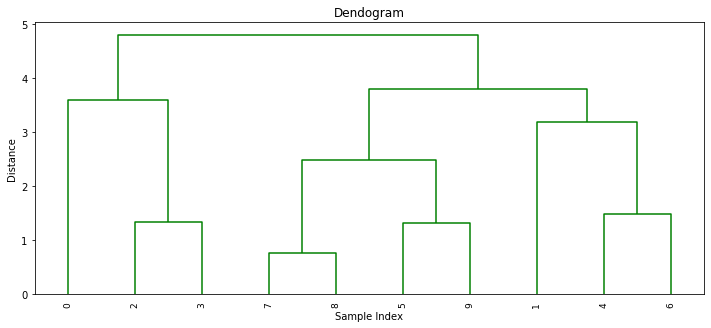

In [61]:
plt.figure(figsize=(12,5))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=90, color_threshold=40, leaf_font_size=9)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [50.0, 50.0, 82.5, 82.5],
  [12.5, 12.5, 66.25, 66.25]],
 'dcoord': [[0.0, 1.3318879651023692, 1.3318879651023692, 0.0],
  [0.0, 3.56396731036817, 3.56396731036817, 1.3318879651023692],
  [0.0, 0.7666083416231964, 0.7666083416231964, 0.0],
  [0.0, 1.308171030020069, 1.308171030020069, 0.0],
  [0.7666083416231964,
   3.063114756836735,
   3.063114756836735,
   1.308171030020069],
  [0.0, 1.4825269878175196, 1.4825269878175196, 0.0],
  [0.0, 3.3787467512307634, 3.3787467512307634, 1.4825269878175196],
  [3.063114756836735,
   4.869545873806819,
   4.869545873806819,
   3.3787467512307634],
  [3.56396731036817, 6.042867428348299, 6.042867428348299, 4.869545873806819]],
 'ivl': ['0', '2', '3', '7', '8', '5', '9', '1', '4', '6'],
 'leaves': [0, 2, 3, 7, 8, 5, 9, 1, 4, 6],
 'color_list': [

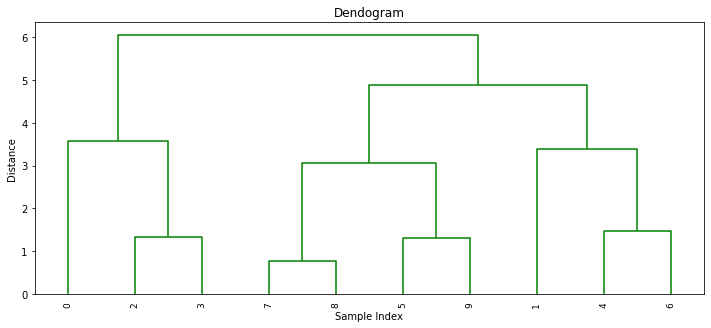

In [62]:
z = linkage(df_scaled, method='ward')
c, coph_dist = cophenet(z, pdist(df_scaled))
c
plt.figure(figsize=(12,5))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(z, leaf_rotation=90, color_threshold=40, leaf_font_size=9)